In [1]:
from Game import *

Version:  0.2.32


## Game functions

In [2]:
def initial_state():
    state=Board(3,3)
    state.pieces=[".","X","O"]
    return state

def show_state(state):
    print(state)
    
def valid_moves(state,player):
    # run through all the spots
    # if it is empty, then append that
    # location to the possible moves
    
    moves=[]
    for location in range(9):
        if state[location]==0:
            moves.append(location)
            
    return moves  

def update_state(state,player,move):
    new_state=state
    
    new_state[move]=player
    return new_state    
    
def win_status(state,player):
    # the state is *after* the move for the player

    #  0  1  2 
    #  3  4  5 
    #  6  7  8   
    
    for start,middle,end in [
        [0,1,2],[3,4,5],[6,7,8],
        [0,3,6],[1,4,7],[2,5,8],
        [0,4,8],[2,4,6],
                ]:
        
        if state[start]==player and state[middle]==player and state[end]==player:
            return "win"
        
    if player==1:
        other_player=2
    else:
        other_player=1
    
    if not valid_moves(state,other_player):
        return "stalemate"
    
    
    
    


## Agent Functions

In [3]:
def human_move(state,player):
    
    state.show_locations()
    print("Player",player)
    move=int(input("which square to move?"))
    return move

human_agent=Agent(human_move)     

In [4]:
def random_move(state,player):
    
    move=random.choice(valid_moves(state,player))
    return move


random_agent=Agent(random_move)

In [5]:
from Game.minimax import *
def minimax_move(state,player):

    values,moves=minimax_values(state,player,display=True)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [7]:
player=1
state=initial_state()
minimax_values(state,player,display=True)

  Choice Time: 2.136528730392456 seconds 


([0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 7, 6, 5, 4, 3, 2, 1, 0])

In [8]:
g=Game()
g.display=False
g.run(minimax_agent,random_agent)

  Choice Time: 2.1416032314300537 seconds 
  Choice Time: 0.11216592788696289 seconds 
  Choice Time: 0.005842924118041992 seconds 
  Choice Time: 0.0003819465637207031 seconds 
  Choice Time: 5.793571472167969e-05 seconds 


[1]

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/bblais/opt/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy', 'prod', 'argmax', 'random', 'draw', 'randint', 'inf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [10]:
T=[2.14,.112,.0058,.00038,5.89e-5]

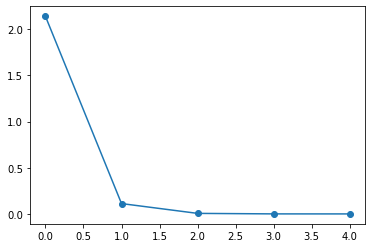

In [11]:
plot(T,'-o')

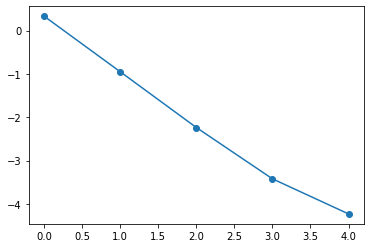

In [12]:
plot(log10(T),'-o')

the log plot has a slope of about -1.  A little closer is,

In [14]:
log10(T)[3]/3

-1.1400721344610634

so the equation for the time would be,

$$
T=2.14\times 10^{-1.14 \cdot {\rm move}}
$$
